In [1]:
using Distributions, Plots
default(size=(800,600))

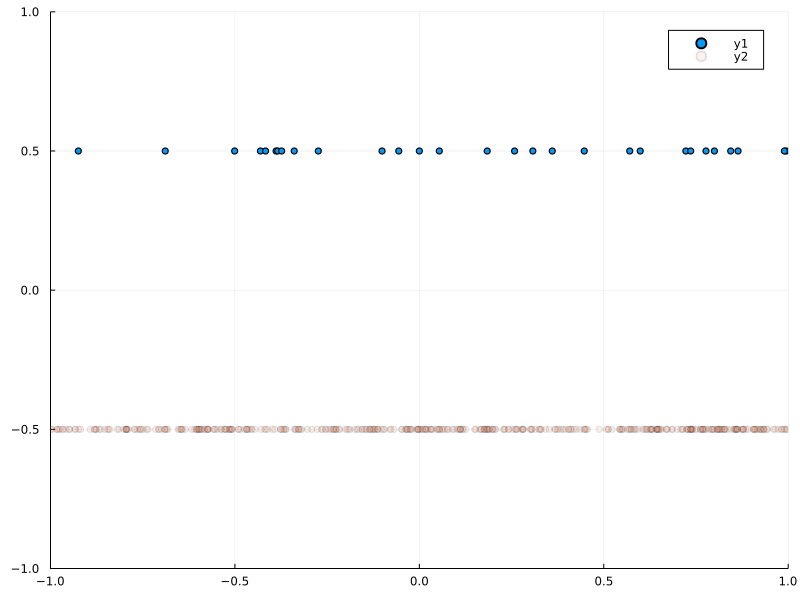

In [17]:
lambda_c=200.0
lambda_a=10.0

distance = 2;

Na = rand(Poisson(lambda_a*distance))

xa = rand(Uniform(-1,1),Na)

xa = [0.0;xa] #Palm conditioning

Nc = rand(Poisson(lambda_c*distance))
xc = rand(Uniform(-1,1),Nc)

scatter(xa,0.5*ones(Na), xlims=(-1,1), ylims=(-1,1))
scatter!(xc, -0.5*ones(Nc), alpha=0.1)

In [18]:
d(x,y) = sqrt(sum((x-y).^2))
W = [d(xa[i,:],xc[j,:]) for i=1:Na+1,j=1:Nc]

attachs = zeros(Nc)

for j=1:Nc    
    _,idx = findmin(W[:,j])
    attachs[j] = idx
end


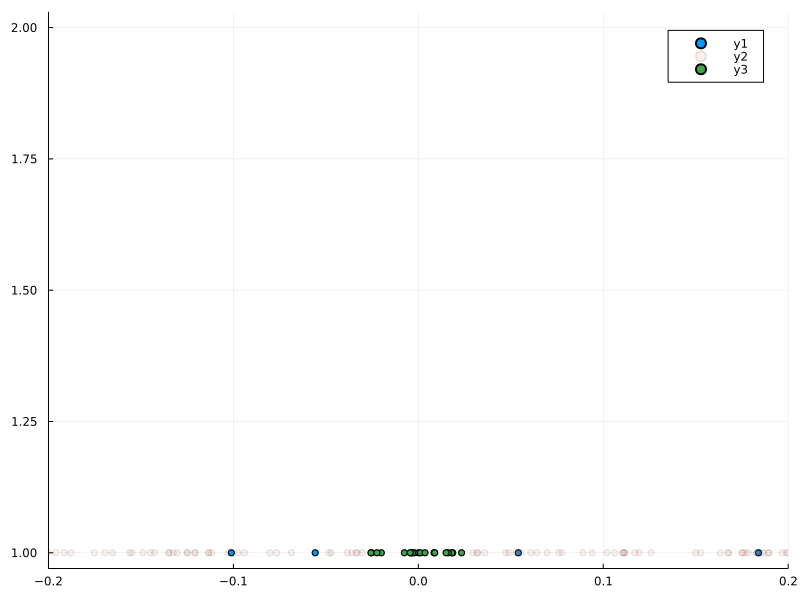

In [19]:
xc0 = xc[attachs.==1.0]
scatter(xa[:,1],ones(Na), xlims=(-.2,.2))
scatter!(xc[:,1], ones(Nc), alpha=0.1)
scatter!(xc0[:,1], ones(size(xc0)))

In [25]:
function countVoronoi(lambda_a,lambda_c)
    
    area_a = 2;

    Na = rand(Poisson(lambda_a*area_a))

    xa = rand(Uniform(-1,1),Na)
    xa = [0.0;xa] #Palm conditioning

    Nc = rand(Poisson(lambda_c*area_a))
    xc = rand(Uniform(-1,1),Nc)
    
    W = [d(xa[i],xc[j]) for i=1:Na+1,j=1:Nc]

    attachs = zeros(Nc)

    for j=1:Nc    
        _,idx = findmin(W[:,j])
        attachs[j] = idx
    end
    return sum(attachs.==1)
end

countVoronoi (generic function with 1 method)

In [26]:
using ProgressMeter

reps=1000

res = zeros(reps)

@showprogress 1 for i=1:reps
    res[i] = countVoronoi(lambda_a,lambda_c)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


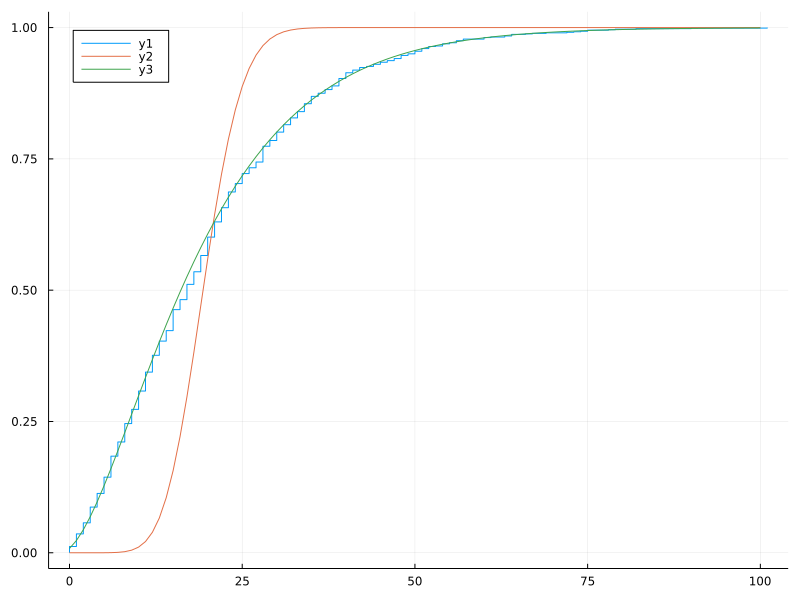

In [29]:
using StatsBase
rho=lambda_c/lambda_a

plot(ecdf(res))
plot!((0:100),cdf(Poisson(rho),(0:100)))

teo = NegativeBinomial(2,2*lambda_a/(lambda_c+2*lambda_a))

plot!((0:100),cdf(teo,0:100))

In [30]:
mean(res), var(res)

(19.858, 221.98381981981984)

In [31]:
rho + rho^2/2


220.0